In [19]:
import math
from numbers import Number
from matplotlib import pyplot as plt

In [14]:
g = -9.81

In [15]:
minimum_E_mek = 54.3113

def E_kin(v):  # Assuming mass of the ball is 1
    return 0.5*abs(v)**2

def E_pot(p):
    return abs(g)*p

def E_mek(v, p):
    return E_kin(v) + E_pot(p)

In [16]:
E_mek(-4, 4)

47.24

In [17]:
def simulate_exact(v: Number, p: Number, bounce1: Number, bounce2: Number, Δt: Number, g:Number, hit=False) -> (Number, Number): 
    """Simulates the ball with a specific velocity v and position p. 
    Parameters:
        v: velocity
        p: height
        bounce1: fraction of velocity preserved when it bounces
        bounce2: fraction of velocity preserved when its hit by the bat
        Δt: timestep
        hit: The action. Whether or not to attempt to hit the ball.
    Returns:
        (v, p): new v and p after timestep Δt"""
    new_v, new_p = None, None  # Result
    v0, p0 = v, p              # To avoid changing argument values
    
    if hit and p >= 4: # Hitting the ball changes the velocity
        if v < 0: 
            v0 = min(v, -4)
        else:
            v0 = -bounce2*v - 4
    
    # Free fall
    new_v = g * Δt + v0
    new_p = 0.5 * g * Δt**2 + v0 * Δt + p0
    
    
    if new_p <= 0: # Hitting the ground
        # Need to establish the exact time t it hits the ground:  0 = 0.5 * g * t**2 + v0 * t + p0
        # This type of equation can have two soutions: t  = (-v0 ± sqrt(v0**2 - 2*g*p0))/g
        #     t1 = (-v0 + sqrt(v0**2 - 2*g*p0))/g
        #     t2 = (-v0 - sqrt(v0**2 - 2*g*p0))/g 
        # In this case, t2 is always the solution. 
        # Proof: t must be positive since the impact occured this timestep.
        #        p0 >= 0 and g < 0 therefore -2*g*p0 >= 0
        #        So therefore abs(v0) <= sqrt(v0**2 - 2*g*p0)
        #        And the ball must have a negative velocity v0 < 0 to hit the ground
        #        So that (-v0 - sqrt(v0**2 - 2*g*p0)) < 0
        #        And divided by g which is also negative we have that 
        #        (-v0 - sqrt(v0**2 - 2*g*p0))/g > 0
        

        #print(f"v0 = {v0:.2f}\tp0 = {p0:.2f}\tt1 = {t1:.2f}\tt2 = {t2:.2f}\tnew_p = {new_p:.2f}")
        #print(f"discriminant = v0**2 - 2*g*p0 = {discriminant:.2f}")
        #print(f"t1 = (-v0 + math.sqrt(v0**2 - 2*g*p0))/g = ({-v0:.2f} + {math.sqrt(v0**2 - 2*g*p0):.2f})/{g:.2f} = {t1:.2f}")
        #print(f"t2 = (-v0 - math.sqrt(v0**2 - 2*g*p0))/g = ({-v0:.2f} - {math.sqrt(v0**2 - 2*g*p0):.2f})/{g:.2f} = {t2:.2f}")
        #print()
        t_impact = (-v0 - math.sqrt(v0**2 - 2*g*p0))/g 
        t_remaining = Δt - t_impact       # Time left this timestep after bounce occurs
        
        new_v = g * t_impact + v0         # Gravity pull before bounce
        
        new_v = -bounce1 * new_v          # Bounce
        
        new_v = g * t_remaining + new_v   # Gravity pull after bounce
        new_p = 0.5 * g * t_remaining**2 + new_v * t_remaining + 0  # Jump height after bounce
        if new_p <= 0:           # If it hits the ground twice within the same timestep, 
            new_v, new_p = 0, 0  # simply put the ball to a stop.
    
    return new_v, new_p

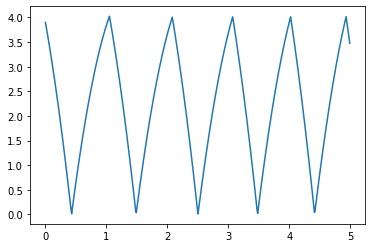

In [43]:
v, p = -7, 3.9
bounce1, bounce2 = 0.85, 0.9
Δt = 0.01

def simulate_many(v0, p0, bounce1, bounce2, Δt, g, time):
    velocities, positions, times = [v0], [p0], [0]
    v, p = v0, p0
    
    for i in range(1, int(time/Δt)):
        v, p = simulate_exact(v, p, bounce1, bounce2, Δt, g, hit=True)
        velocities.append(v)
        positions.append(p)
        times.append(i*Δt)
    return velocities, positions, times
    
    
velocities, positions, times = simulate_many(v, p, bounce1, bounce2, Δt, g, 5)

plt.plot(times, positions)